In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing the various libraries 

In [2]:
data=pd.read_csv('/Users/eberechukwukathomas/Downloads/labeled_data.csv')
# reading the data from a location in my directory 


In [3]:
data.head(10)
#checking the first 10 data 

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [4]:
data=data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1)

#dropping Irrelevant columns which wont have meaning to the dataset

In [5]:
data.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [6]:
len(data)

24783

In [7]:
nltk.download('stopwords')
corpus=[]

for i in range(0, len(data)):
    review=re.sub('[^a-zA-Z]', ' ', data['tweet'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
#Preprocessing the data
#1st We substituted all elements which aren't letters with space in the tweets column 
#2nd We made sure that all the letters are in lowercase 
#3rd We split the entire data 
#4th We stemmed the entire dataset to make all the words have their root word meaning 
#5th Then we appended the data into a file list

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eberechukwukathomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
len(corpus)

24783

In [9]:
cv=CountVectorizer(max_features=100)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,0].values

#We performed vectorization on the word to convert it into numerical Representions which the data understands. 

In [10]:
len(y)

24783

In [11]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
#Splitting the data into test and train set

In [12]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.48497074843655436

In [13]:
yNB=[]

for i in y_pred:
    if i==0:
        yNB.append('Hate Speech')
    elif i==1:
        yNB.append('Offensive Speech')
    else:
        yNB.append('Normal')

In [14]:
Hate_Speech=(yNB.count('Hate Speech'))
Offensive_Speech=(yNB.count('Offensive Speech'))
Normal=(yNB.count('Normal'))






In [15]:
Offensive_Speech

1502

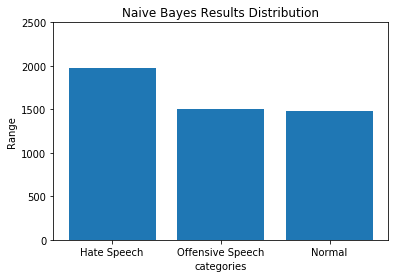

In [16]:
import matplotlib.pyplot as plt
x=[Hate_Speech,Offensive_Speech,Normal]
bars=('Hate Speech','Offensive Speech','Normal')
y_pos=np.arange(len(bars))
plt.bar(y_pos, x)
plt.title('Naive Bayes Results Distribution')
plt.xlabel('categories')
plt.ylabel('Range')
plt.ylim(0,2500)
plt.xticks(y_pos, bars)
plt.show()


In [17]:
DTC= DecisionTreeClassifier()
DTCC=DTC.fit(X_train, y_train)
y_predd=DTCC.predict(X_test)
from sklearn.metrics import accuracy_score
accp=accuracy_score(y_test,y_predd)
accp

0.8551543272140407

In [18]:
yDTC=[]

for i in y_predd:
    if i==0:
        yDTC.append('Hate Speech')
    elif i==1:
        yDTC.append('Offensive Speech')
    else:
        yDTC.append('Normal')

In [19]:
Hate_Speech=(yDTC.count('Hate Speech'))
Offensive_Speech=(yDTC.count('Offensive Speech'))
Normal=(yDTC.count('Normal'))

In [20]:
Offensive_Speech

3730

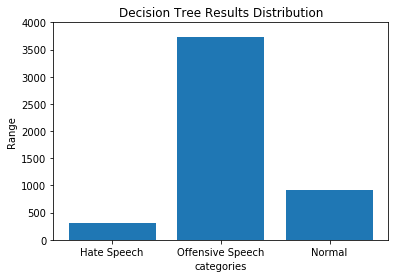

In [21]:
import matplotlib.pyplot as plt
xx=[Hate_Speech,Offensive_Speech,Normal]
barss=('Hate Speech','Offensive Speech','Normal')
y_poss=np.arange(len(barss))
plt.bar(y_poss, xx)
plt.title('Decision Tree Results Distribution')
plt.xlabel('categories')
plt.ylabel('Range')
plt.ylim(0,4000)
plt.xticks(y_poss, barss)
plt.show()

In [22]:
RFC=RandomForestClassifier()
RFCC=RFC.fit(X_train, y_train)
y_preddd=RFCC.predict(X_test)
from sklearn.metrics import accuracy_score
accpp=accuracy_score(y_test,y_preddd)
accpp

0.8751260843251967

In [23]:
yDTCC=[]

for i in y_preddd:
    if i==0:
        yDTCC.append('Hate Speech')
    elif i==1:
        yDTCC.append('Offensive Speech')
    else:
        yDTCC.append('Normal')

In [24]:
Hate_Speech=(yDTCC.count('Hate Speech'))
Offensive_Speech=(yDTCC.count('Offensive Speech'))
Normal=(yDTCC.count('Normal'))

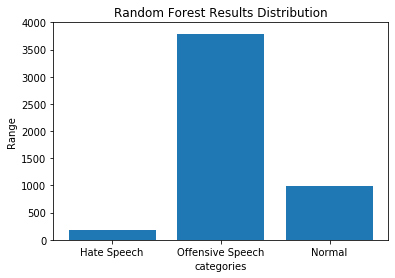

In [25]:
import matplotlib.pyplot as plt
xxx=[Hate_Speech,Offensive_Speech,Normal]
barsss=('Hate Speech','Offensive Speech','Normal')
y_poss=np.arange(len(barss))
plt.bar(y_poss, xxx)
plt.title('Random Forest Results Distribution')
plt.xlabel('categories')
plt.ylabel('Range')
plt.ylim(0,4000)
plt.xticks(y_poss, barsss)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=3)
Knn1=Knn.fit(X_train, y_train)
y_preded=Knn1.predict(X_test)
from sklearn.metrics import accuracy_score
accps=accuracy_score(y_test,y_preded)
accps

0.8501109542061731

In [27]:
yDTCCC=[]

for i in y_preddd:
    if i==0:
        yDTCCC.append('Hate Speech')
    elif i==1:
        yDTCCC.append('Offensive Speech')
    else:
        yDTCCC.append('Normal')

In [28]:
Hate_Speech=(yDTCCC.count('Hate Speech'))
Offensive_Speech=(yDTCCC.count('Offensive Speech'))
Normal=(yDTCCC.count('Normal'))

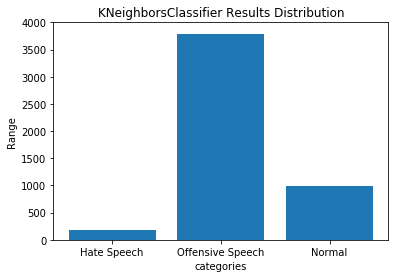

In [29]:
import matplotlib.pyplot as plt
xxxy=[Hate_Speech,Offensive_Speech,Normal]
barssss=('Hate Speech','Offensive Speech','Normal')
y_posss=np.arange(len(barssss))
plt.bar(y_posss, xxxy)
plt.title('KNeighborsClassifier Results Distribution')
plt.xlabel('categories')
plt.ylabel('Range')
plt.ylim(0,4000)
plt.xticks(y_posss, barssss)
plt.show()

In [30]:
import tensorflow as tf 
import tflearn 
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
from tensorflow.keras.models import Sequential 
from tensorflow import keras


/Users/eberechukwukathomas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/eberechukwukathomas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/eberechukwukathomas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/eberechukwukathomas/o

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
# model=keras.Sequential()
# model.add(Embedding(24783, output_dim=100,input_shape=(X_train.shape[1],)))
# model.add(LSTM(units=60, activation='sigmoid',return_sequences=True))
# model.add(Dropout(0.2))
# # model.add(LSTM(units=60,activation='sigmoid',return_sequences=True))
# # model.add(Dropout(0.2))
# # model.add(LSTM(units=60,activation='sigmoid',return_sequences=True))
# # model.add(Dropout(0.2))
# # model.add(LSTM(units=40,activation='sigmoid',return_sequences=True))
# # model.add(Dropout(0.2))
# # model.add(LSTM(units=20,activation='sigmoid',return_sequences=True))
# # model.add(Dropout(0.2))
# model.add(LSTM(units=60))
# model.add(Dropout(0.1)) 
# model.add(Dense(units=1, activation='sigmoid'))
# opt = keras.optimizers.SGD(lr=0.0001)
# model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# history=model.fit(X_train, y_train, epochs=10, batch_size= 32, validation_split=0.1)
# # # # # model.save('20868189_NLP_model')




In [ ]:
# history.history

In [ ]:
# y_predic=model.predict(X_test)

In [ ]:
# yDP=[]

# for i in y_predic:
#     if i==0:
#         yDP.append('Hate Speech')
#     elif i==1:
#         yDP.append('Offensive Speech')
#     else:
#         yDP.append('Normal')

In [ ]:
# yDP

In [ ]:
# Hate_Speech=(yDP.count('Hate Speech'))
# Offensive_Speech=(yDP.count('Offensive Speech'))
# Normal=(yDP.count('Normal'))

In [ ]:
# Offensive_Speech


In [ ]:
# import matplotlib.pyplot as plt
# xy=[Hate_Speech,Offensive_Speech,Normal]
# barsssy=('Hate Speech','Offensive Speech','Normal')
# y_possy=np.arange(len(barssss))
# plt.bar(y_possy, xy)
# plt.title('KNeighborsClassifier Results Distribution')
# plt.xlabel('categories')
# plt.ylabel('Range')
# plt.ylim(0,4000)
# plt.xticks(y_possy, barsssy)
# plt.show()